In [1]:
import pandas as pd
import fdb
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal

In [2]:
#cash_book_path = 'C:/Users/SQL/Documents/BOKOPT_GL_CB_202311291624.csv'
#cash_book = pd.read_csv(cash_book_path)
#cash_book

In [3]:
#cash_book_detail_path ='C:/Users/SQL/Documents/BOKOPT_GL_CBDTL_202311291624.csv'
#cash_book_detail = pd.read_csv(cash_book_detail_path)
#cash_book_detail

In [4]:
hostname = "localhost"
database_path = "C:/eStream/SQLAccounting/DB/BOK OPT SDN BHD.FDB"
username = "SYSDBA"
password = "masterkey"

In [5]:
# Create a connection
connection = fdb.connect(
    host=hostname,
    database=database_path,
    user=username,
    password=password,
)

In [6]:
# Create a Cursor object that operates in the context of Connection con:
cur = connection.cursor()

# Execute the SELECT statement:
cur.execute("select * from GL_CB")

# Fetch all records
records = cur.fetchall()

column_names = [desc[0] for desc in cur.description]

# Close the cursor and connection
cur.close()

cash_book = pd.DataFrame(records, columns=column_names)
cash_book

,DOCKEY,DOCNO,DOCTYPE,DOCDATE,POSTDATE,TAXDATE,DESCRIPTION,DESCRIPTION2,PAYMENTMETHOD,AREA,...,LOCALDOCAMT,FROMDOCTYPE,BOUNCEDDATE,GLTRANSID,CANCELLED,DEPOSITKEY,UPDATECOUNT,PRINTCOUNT,ATTACHMENTS,NOTE
0,320,PV-1311/001,PV,2013-11-30,2013-11-30,2013-11-30,NG KOK LIANG,Payment For SSM Registration and Printing,301-001,----,...,3209,None,None,167,F,None,NaN,0,None,None
1,322,PV-1311/002,PV,2013-11-20,2013-11-20,2013-11-20,OLIVER LEE FU ONN,Payment For Nov'13 Staff Salary,301-001,----,...,3270.25,None,None,168,F,None,NaN,0,None,None
2,328,PV-1311/003,PV,2013-11-30,2013-11-30,2013-11-30,KUMPULAN WANG SIMPANAN PEKERJA,Payment For Nov'13 Staff EPF Contribution,301-001,----,...,480,None,None,169,F,None,NaN,0,None,None
3,330,PV-1311/004,PV,2013-11-30,2013-11-30,2013-11-30,PERTUBUHAN KESELAMATAN SOSIAL,Payment For Nov'13 Staff Socso,301-001,----,...,43.9,None,None,170,F,None,NaN,0,None,None
4,332,PV-1312/001,PV,2013-12-31,2013-12-31,2013-12-31,KUMPULAN WANG SIMPANAN PEKERJA,Payment For Dec'13 Staff EPF Contribution,301-001,----,...,480,None,None,171,F,None,NaN,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17801,78807,OR 220524,OR,2022-05-24,2022-05-24,2022-05-24,SHENZHEN STS MICROELECTRONICS CO LTD,Payment For Invoice - IN2201-021,301-003,CN,...,28277.8,PM,None,39129,F,None,NaN,0,None,None
17802,78809,OR 220525,OR,2022-05-26,2022-05-26,2022-05-26,PALMTOP VEGEOIL PRODUCTS SDN BHD,Payment For Invoice - IN2204-037,301-003,JB,...,295,PM,None,39167,F,None,NaN,0,None,None
17803,78811,OR 220526,OR,2022-05-27,2022-05-27,2022-05-27,FGV JOHOR BULKERS SDN BHD,Payment For Invoice - IN2204-124,301-003,JB,...,1060,PM,None,39196,F,None,NaN,0,None,None
17804,78813,OR 220527,OR,2022-05-27,2022-05-27,2022-05-27,ANALOG DEVICES SDN.BHD,Payment For Invoice - IN2204-052,301-003,----,...,2250,PM,None,39197,F,None,NaN,0,None,None


In [7]:
# Create a Cursor object that operates in the context of Connection con:
cur = connection.cursor()

# Execute the SELECT statement:
cur.execute("select * from GL_CBDTL")

# Fetch all records
records = cur.fetchall()

column_names = [desc[0] for desc in cur.description]

# Close the cursor and connection
cur.close()
connection.close()

cash_book_detail = pd.DataFrame(records, columns=column_names)
cash_book_detail

,DTLKEY,DOCKEY,SEQ,AREA,AGENT,PROJECT,CODE,DESCRIPTION,GST_DOCDATE,GST_DOCNO,...,TARIFF,TAXRATE,TAXAMT,LOCALTAXAMT,TAXINCLUSIVE,AMOUNT,LOCALAMOUNT,CURRENCYCODE,CURRENCYRATE,CURRENCYAMOUNT
0,321,320,1,----,----,----,711-000,Ng Kok Liang-SSM Registration & Documents Prin...,None,None,...,None,None,0,0,0,3209,3209,----,1,3209
1,323,322,1,----,----,----,719-000,Oliver Lee Fu Onn-Nov'13 Salary,None,None,...,None,None,0,0,0,2000,2000,----,1,2000
2,325,322,2,----,----,----,720-000,Oliver Lee Fu Onn-Nov'13 Allowance,None,None,...,None,None,0,0,0,1500,1500,----,1,1500
3,326,322,3,----,----,----,708-000,Oliver Lee Fu Onn-Nov'13 Salary,None,None,...,None,None,0,0,0,-220,-220,----,1,-220
4,327,322,4,----,----,----,721-000,Oliver Lee Fu Onn-Nov'13 Salary,None,None,...,None,None,0,0,0,-9.75,-9.75,----,1,-9.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56561,78808,78807,1,CN,CADEN HENG,----,300-S0029,Payment For Invoice - IN2201-021,None,None,...,None,None,0,0,0,28277.8,28277.8,US$,4.28613869,6597.5
56562,78810,78809,1,JB,ALAN TANG,----,300-P0022,Payment For Invoice - IN2204-037,None,None,...,None,None,0,0,0,295,295,----,1,295
56563,78812,78811,1,JB,ALAN TANG,----,300-F0005,Payment For Invoice - IN2204-124,None,None,...,None,None,0,0,0,1060,1060,----,1,1060
56564,78814,78813,1,----,KK KUOK,----,300-A0010,Payment For Invoice - IN2204-052,None,None,...,None,None,0,0,0,2250,2250,----,1,2250


In [8]:
cash_book_column = cash_book.columns
print(cash_book_column)

Index(['DOCKEY', 'DOCNO', 'DOCTYPE', 'DOCDATE', 'POSTDATE', 'TAXDATE',
       'DESCRIPTION', 'DESCRIPTION2', 'PAYMENTMETHOD', 'AREA', 'AGENT',
       'PROJECT', 'JOURNAL', 'CHEQUENUMBER', 'CURRENCYCODE', 'CURRENCYRATE',
       'BANKCHARGE', 'BANKCHARGEACCOUNT', 'DOCAMT', 'LOCALDOCAMT',
       'FROMDOCTYPE', 'BOUNCEDDATE', 'GLTRANSID', 'CANCELLED', 'DEPOSITKEY',
       'UPDATECOUNT', 'PRINTCOUNT', 'ATTACHMENTS', 'NOTE'],
      dtype='object')


In [9]:
cash_book_detail_column = cash_book_detail.columns
print(cash_book_detail_column)

Index(['DTLKEY', 'DOCKEY', 'SEQ', 'AREA', 'AGENT', 'PROJECT', 'CODE',
       'DESCRIPTION', 'GST_DOCDATE', 'GST_DOCNO', 'COMPANYNAME', 'REGISTERNO',
       'GSTNO', 'PERMITNO', 'COUNTRY', 'TAX', 'TARIFF', 'TAXRATE', 'TAXAMT',
       'LOCALTAXAMT', 'TAXINCLUSIVE', 'AMOUNT', 'LOCALAMOUNT', 'CURRENCYCODE',
       'CURRENCYRATE', 'CURRENCYAMOUNT'],
      dtype='object')


In [10]:
cash_book = cash_book.drop(['DOCNO', 'POSTDATE', 'TAXDATE',
       'DESCRIPTION', 'DESCRIPTION2', 'PAYMENTMETHOD', 'AREA', 'AGENT',
       'PROJECT', 'JOURNAL', 'CHEQUENUMBER', 'CURRENCYCODE', 'CURRENCYRATE',
       'BANKCHARGE', 'BANKCHARGEACCOUNT', 'DOCAMT', 'LOCALDOCAMT',
       'FROMDOCTYPE', 'BOUNCEDDATE', 'GLTRANSID', 'CANCELLED', 'DEPOSITKEY',
       'UPDATECOUNT', 'PRINTCOUNT', 'ATTACHMENTS', 'NOTE'], axis=1)

cash_book_detail = cash_book_detail.drop(['DTLKEY', 'SEQ', 'AREA', 'AGENT', 'PROJECT',
       'DESCRIPTION', 'GST_DOCDATE', 'GST_DOCNO', 'COMPANYNAME', 'REGISTERNO',
       'GSTNO', 'PERMITNO', 'COUNTRY', 'TAX', 'TARIFF', 'TAXRATE', 'TAXAMT',
       'LOCALTAXAMT', 'TAXINCLUSIVE', 'AMOUNT', 'LOCALAMOUNT', 'CURRENCYCODE',
       'CURRENCYRATE'], axis=1)

In [11]:
merged_cash_book = pd.merge(cash_book, cash_book_detail, on='DOCKEY')
merged_cash_book

,DOCKEY,DOCTYPE,DOCDATE,CODE,CURRENCYAMOUNT
0,320,PV,2013-11-30,711-000,3209
1,322,PV,2013-11-20,719-000,2000
2,322,PV,2013-11-20,720-000,1500
3,322,PV,2013-11-20,708-000,-220
4,322,PV,2013-11-20,721-000,-9.75
...,...,...,...,...,...
56561,78807,OR,2022-05-24,300-S0029,6597.5
56562,78809,OR,2022-05-26,300-P0022,295
56563,78811,OR,2022-05-27,300-F0005,1060
56564,78813,OR,2022-05-27,300-A0010,2250


In [12]:
# Convert 'DOCDATE' to datetime
merged_cash_book['DOCDATE'] = pd.to_datetime(merged_cash_book['DOCDATE'])

# Extract year, month, and day into separate columns
merged_cash_book['Year'] = merged_cash_book['DOCDATE'].dt.year
merged_cash_book['Month'] = merged_cash_book['DOCDATE'].dt.month
merged_cash_book['Day'] = merged_cash_book['DOCDATE'].dt.day

# Drop the original 'DOCDATE' column
merged_cash_book.drop('DOCDATE', axis=1, inplace=True)

merged_cash_book

,DOCKEY,DOCTYPE,CODE,CURRENCYAMOUNT,Year,Month,Day
0,320,PV,711-000,3209,2013,11,30
1,322,PV,719-000,2000,2013,11,20
2,322,PV,720-000,1500,2013,11,20
3,322,PV,708-000,-220,2013,11,20
4,322,PV,721-000,-9.75,2013,11,20
...,...,...,...,...,...,...,...
56561,78807,OR,300-S0029,6597.5,2022,5,24
56562,78809,OR,300-P0022,295,2022,5,26
56563,78811,OR,300-F0005,1060,2022,5,27
56564,78813,OR,300-A0010,2250,2022,5,27


In [13]:
merged_cash_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56566 entries, 0 to 56565
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DOCKEY          56566 non-null  int64 
 1   DOCTYPE         56566 non-null  object
 2   CODE            56566 non-null  object
 3   CURRENCYAMOUNT  56566 non-null  object
 4   Year            56566 non-null  int32 
 5   Month           56566 non-null  int32 
 6   Day             56566 non-null  int32 
dtypes: int32(3), int64(1), object(3)
memory usage: 2.4+ MB


In [14]:
# Group by 'CODE' and collect 'CURRENCYAMOUNT' into lists
grouped_data = merged_cash_book.groupby(['CODE'])['CURRENCYAMOUNT'].apply(list).reset_index()

# Sort the 'CURRENCYAMOUNT' arrays in ascending order
grouped_data['CURRENCYAMOUNT'] = grouped_data['CURRENCYAMOUNT'].apply(lambda x: sorted(x))

# Display all rows and columns of the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
grouped_data

,CODE,CURRENCYAMOUNT
0,100-000,"[10, 5000, 5000, 25000, 25000, 39988, 40000, 50000, 50000, 50000, 50000, 50000]"
1,200-000,"[1000, 1185, 1245, 1250, 2000, 2450, 3663, 5300, 5965]"
2,201-000,"[130, 660, 740, 749, 811.32, 1460, 1890, 1890, 2054.72, 2190, 2923.59, 3099, 3999, 5880, 6080]"
3,202-000,"[94.25, 94.25, 94.25, 94.25, 179.25, 299.15, 1000, 1278, 1280, 1339.2, 1392.5, 1450, 1568, 1686, 2256.7, 2498, 4809.27, 17210]"
4,202-001,[2830.19]
5,203-000,"[750, 800, 855, 877.36, 1250, 1300, 1400, 1580, 2200, 4550]"
6,204-000,"[3000, 3600, 7000, 7335, 9000, 50000]"
7,205-000,"[100, 100, 103.75, 103.75, 103.75, 103.75, 103.75, 103.75, 103.75, 103.75, 108, 128, 128, 128, 200, 292.45, 420, 420, 450, 450, 450, 550, 555, 588, 639, 660, 754.72, 830, 834.91, 915, 943.4, 980, 1000, 1014.72, 1137.74, 1194, 1200, 1200, 1300, 1460, 1560, 1570, 1575, 1695, 1850, 2660, 2700, 2830, 2937, 3029, 3350, 4650, 5329.22, 5820]"
8,206-000,"[420, 442, 469, 470.75, 559, 754.72, 798, 3505, 3900]"
9,207-000,"[850, 1000, 1300, 3050]"


In [15]:
def anomaly_detection_graph(code, mean, lower_bound, upper_bound, valid_data, outliers):
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(valid_data + outliers, label='Data')
    plt.axhline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axhline(lower_bound, color='green', linestyle='dashed', linewidth=2, label='Lower Bound')
    plt.axhline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Upper Bound')

    # Highlight valid data and outliers
    plt.scatter(range(len(valid_data)), valid_data, c='blue', label='Valid Data')
    plt.scatter(range(len(valid_data), len(valid_data) + len(outliers)), outliers, c='red', label='Outliers')

    plt.xlabel('Data Point Index')
    plt.ylabel('Value')
    plt.title(f'Data for Code: {code} with Mean, Valid Data, and Outliers')
    plt.legend()
    plt.show()

In [16]:
def anomaly_detection(data):
    data = [float(val) for val in data]

    mean_value = np.mean(data)
    #mean_value = np.median(data)
    std_deviation = np.std(data)
    rsd = (std_deviation / mean_value) * 100

    # Calculate a range based on the relative standard deviation
    lower_bound = mean_value - 1.65 * std_deviation
    upper_bound = mean_value + 1.65 * std_deviation

    if lower_bound < 0:
        lower_bound = 0

    # Identify valid data within the bounds and outliers
    valid_data = [x for x in data if lower_bound <= x <= upper_bound]
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
   
    return {
        "Mean": mean_value,
        "Standard Deviation": std_deviation,
        "Relative Standard Deviation (RSD)": rsd,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Valid Data": valid_data,
        "Outliers": outliers
    }

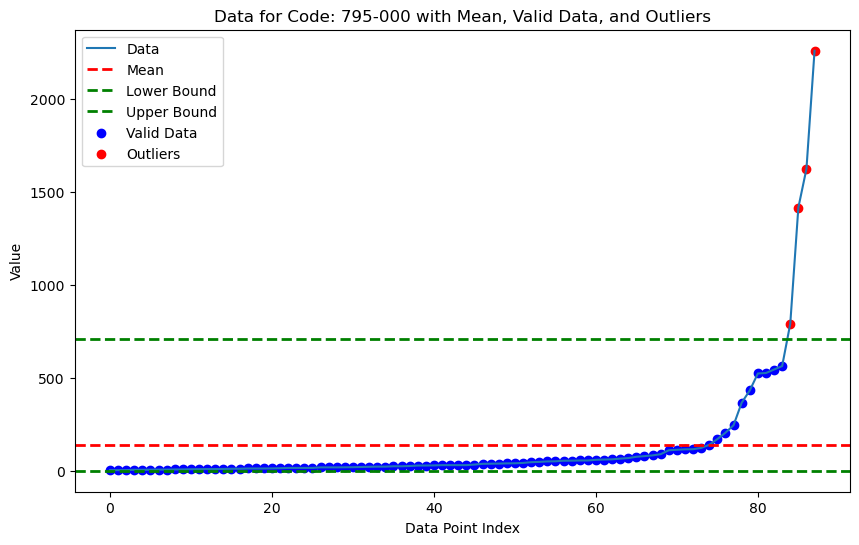

Mean: 140.7236363636364
Standard Deviation: 343.95666639452037
Relative Standard Deviation (RSD): 244.42%
Lower Bound: 0
Upper Bound: 708.252135914595

Valid Data: [3.0, 3.0, 3.2, 5.0, 5.0, 5.5, 6.0, 6.0, 6.85, 7.0, 8.0, 8.5, 9.0, 9.0, 9.5, 10.5, 10.69, 12.0, 12.0, 12.0, 12.5, 13.53, 15.0, 15.0, 15.0, 15.1, 18.0, 18.0, 18.0, 18.45, 19.0, 20.0, 21.13, 22.0, 22.0, 24.0, 24.0, 25.35, 27.8, 27.9, 28.6, 30.0, 30.0, 30.0, 30.0, 33.02, 37.07, 37.73, 38.35, 39.5, 40.0, 41.84, 45.9, 47.5, 50.0, 50.7, 53.78, 54.0, 55.0, 55.0, 58.68, 60.0, 61.32, 65.0, 68.0, 75.0, 78.5, 82.53, 89.0, 110.0, 112.7, 115.0, 115.6, 122.5, 139.55, 170.0, 204.5, 244.8, 365.51, 431.62, 522.96, 525.34, 544.21, 562.8]

Outliers: [790.0, 1415.05, 1623.38, 2258.64]


In [17]:
code_input = '795-000'
selected_data = grouped_data[grouped_data['CODE'] == code_input]['CURRENCYAMOUNT'].iloc[0]
ad_result = anomaly_detection(selected_data)

# Extracting values from the result
mean_value = ad_result["Mean"]
std_deviation = ad_result["Standard Deviation"]
rsd = ad_result["Relative Standard Deviation (RSD)"]
lower_bound = ad_result["Lower Bound"]
upper_bound = ad_result["Upper Bound"]
valid_data = ad_result["Valid Data"]
outliers = ad_result["Outliers"]

# Display the graph
anomaly_detection_graph(code_input, mean_value, lower_bound, upper_bound, valid_data, outliers)

# Print the calculated values
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Relative Standard Deviation (RSD): {rsd:.2f}%")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"\nValid Data: {valid_data}")
print(f"\nOutliers: {outliers}")

Enter a value: 500
The entered value 500.0 is within the valid range.


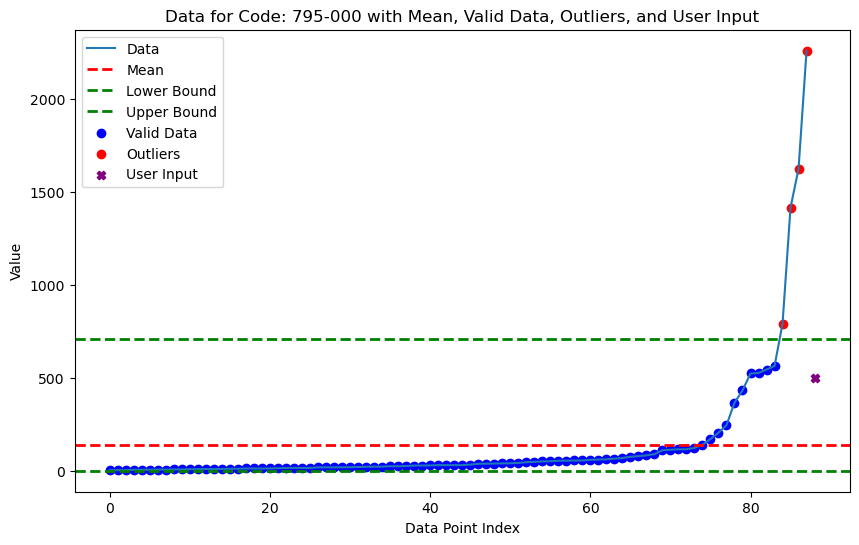

In [18]:
def user_input_anomaly_detection(code, mean, lower_bound, upper_bound, valid_data, outliers):
    try:
        user_input = float(input("Enter a value: "))

        if lower_bound <= user_input <= upper_bound:
            print(f"The entered value {user_input} is within the valid range.")
        elif user_input < lower_bound or user_input > upper_bound:
            print(f"The entered value {user_input}  is an outlier.")
        else:
            print("Invalid input.")

        # Plot the data with the entered value
        plt.figure(figsize=(10, 6))
        plt.plot(valid_data + outliers, label='Data')
        plt.axhline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
        plt.axhline(lower_bound, color='green', linestyle='dashed', linewidth=2, label='Lower Bound')
        plt.axhline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Upper Bound')

        # Highlight valid data and outliers
        plt.scatter(range(len(valid_data)), valid_data, c='blue', label='Valid Data')
        plt.scatter(range(len(valid_data), len(valid_data) + len(outliers)), outliers, c='red', label='Outliers')

        # Highlight the user input
        plt.scatter(len(valid_data) + len(outliers), user_input, c='purple', marker='X', label='User Input')

        plt.xlabel('Data Point Index')
        plt.ylabel('Value')
        plt.title(f'Data for Code: {code} with Mean, Valid Data, Outliers, and User Input')
        plt.legend()
        plt.show()

    except ValueError as e:
        print(f"Error: {e}")

# Example usage
user_input_anomaly_detection(code_input, mean_value, lower_bound, upper_bound, valid_data, outliers)

In [19]:
def correctness_percentage(data_point, mean, lower_bound, upper_bound):
    if lower_bound <= data_point <= mean:
        return (data_point - lower_bound) / (mean - lower_bound) * 100.0
    elif mean < data_point <= upper_bound:
        return 100.0 - ((data_point - mean) / (upper_bound - mean) * 100.0)
    else:  # data_point > upper_bound
        return 0.0

def display_low_correctness_data(code, mean, lower_bound, upper_bound, valid_data, outliers, correctness_threshold):
    low_correctness_data = []

    for data_point in valid_data:
        correctness_percent = correctness_percentage(data_point, mean, lower_bound, upper_bound)
        if correctness_percent < correctness_threshold:
            low_correctness_data.append((data_point, correctness_percent))

    # Display low correctness data
    if low_correctness_data:
        print(f"Data points below {correctness_threshold}% correctness:")
        
        # Separate and print categories
        lower_bound_to_mean = [(val, correctness) for val, correctness in low_correctness_data if val <= mean]
        mean_to_upper_bound = [(val, correctness) for val, correctness in low_correctness_data if val > mean]
        
        if lower_bound_to_mean:
            print("\nData points below correctness in the range lower bound to mean:")
            for val, correctness in lower_bound_to_mean:
                print(f"Value: {val}, Correctness: {correctness:.2f}%")

        if mean_to_upper_bound:
            print("\nData points below correctness in the range mean to upper bound:")
            for val, correctness in mean_to_upper_bound:
                print(f"Value: {val}, Correctness: {correctness:.2f}%")
    else:
        print(f"All data points are above {correctness_threshold}% correctness.")

# Example usage
correctness_threshold = float(input("Enter a percentage: "))
display_low_correctness_data(code_input, mean_value, lower_bound, upper_bound, valid_data, outliers, correctness_threshold)

Enter a percentage: 50
Data points below 50.0% correctness:

Data points below correctness in the range lower bound to mean:
Value: 3.0, Correctness: 2.13%
Value: 3.0, Correctness: 2.13%
Value: 3.2, Correctness: 2.27%
Value: 5.0, Correctness: 3.55%
Value: 5.0, Correctness: 3.55%
Value: 5.5, Correctness: 3.91%
Value: 6.0, Correctness: 4.26%
Value: 6.0, Correctness: 4.26%
Value: 6.85, Correctness: 4.87%
Value: 7.0, Correctness: 4.97%
Value: 8.0, Correctness: 5.68%
Value: 8.5, Correctness: 6.04%
Value: 9.0, Correctness: 6.40%
Value: 9.0, Correctness: 6.40%
Value: 9.5, Correctness: 6.75%
Value: 10.5, Correctness: 7.46%
Value: 10.69, Correctness: 7.60%
Value: 12.0, Correctness: 8.53%
Value: 12.0, Correctness: 8.53%
Value: 12.0, Correctness: 8.53%
Value: 12.5, Correctness: 8.88%
Value: 13.53, Correctness: 9.61%
Value: 15.0, Correctness: 10.66%
Value: 15.0, Correctness: 10.66%
Value: 15.0, Correctness: 10.66%
Value: 15.1, Correctness: 10.73%
Value: 18.0, Correctness: 12.79%
Value: 18.0, Corre